<a href="https://colab.research.google.com/github/rdviii/quantum-teaching/blob/main/2D-wave-interference-intensity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Intensity of Interference Pattern in 2-D Waves

Keio SFC Quantum Information Processing, Fall 2020

Based on a notebook by takanori, adapted by rdv

In Step 1.14 of the MOOC, you saw what the amplitude of the waves created by two interfering sources looks like. In fact, you get _constructive interference_ at some points, where both waves add up, and _destructive interference_ at other places, where they cancel out.  Let's look at the mathematics for this, and calculate the corresponding intensity of the light at those points.

## Derivation of the Equation for 2-D Interference

The intensity of light that you see is the _square_ of the _amplitude_ of the wave. Of course, since we don't see changes as fast as that wave is changing, what we see is also an _integral_, or roughly an average, over some period of time.

Let's go through a quick derivation of that average intensity for **two sources** that are each radiating a wave, so we can see the interference pattern develop. Let's make some simplifying assumptions that aren't fully physically correct, but let us see the concepts clearly.

* Amplitude of each wave is 1, and doesn't change with distance. (In reality, waves fade as they get farther from the source.)
* The frequency of each source is 1 cycle ($2\pi$) per unit time.
* Both sources are completely _in phase_; their cycles start at the same time.
* The speed of propagation is 1 unit of distance per unit of time.

If we have one source at the origin, its wave amplitude at the origin is $\sin(2\pi t)$. If the other is displaced by a distance $x$ along the X axis, then it arrives at the origin at time $x$ (remember, it's moving at a speed of 1). So its wave amplitude at the origin is $\sin(2\pi(t-x))$. If we add them together, and remembering that $\cos(-\theta) = \cos(\theta)$ we get:

\begin{eqnarray}
  \sin(2\pi t)+\sin(2\pi(t-x))
  &=& 2\sin\left(\frac{2\pi(2t-x)}{2}\right)\cos\frac{-2\pi x}{2} \\
  &=& 2\sin(2\pi t-\pi x)\cos(-\pi x) \\
  &=& 2\sin(2\pi t-\pi x)\cos(\pi x)
\end{eqnarray}


Now, to get the amplitude, we need to _integrate_ over one cycle of the sources.  If you haven't taken basic calculus yet, you might not know what the $\int$ symbol means; basically, it means to sum up the function over some time or distance.  You don't really need that math for anything we are doing this semester, so if it's unfamiliar, you can pretty safely ignore it. Just take our word for it that the intensity at one point is based on the separation $x$ between the two sources, as in the last line of this derivation.

\begin{eqnarray}
  \int_{0}^{1}\left|\sin(2\pi t)+\sin(2\pi(t-x))\right|^2dt
  &=& \int_{0}^{1}4\sin^2(2\pi t-\pi x)\cos^2(-\pi x)dt \\
  &=& 4\cos^2(\pi x)\int_{0}^{1}\sin^2(2\pi t-\pi x)dt \\
  &=& 4\cos^2(\pi x)\int_{0}^{1}\sin^2(2\pi t)dt \\
  &=& 4\cos^2(\pi x)\times0.5 \\
  &=& 2\cos^2(\pi x)
\end{eqnarray}

## Plotting the Pattern over an Area

First, a little bit of setup. Don't worry much about this.

In [2]:
from PIL import Image
import math
import numpy as np

Let's set one source at x=10, and the other at x=-10, and set the wavelength to 0.5.

The function F() takes as arguments the X and Y coordinates of a point whose intensity you want to know. It calculates first the distance from each source, then turns that into the _relative phase_ of the two sources, and returns the square of the cosine of that relative phase, in agreement with the equations above. (Above, we assumed one source was at the origin, but here we're assuming both are some distance away; the extension of the equations is pretty easy, and all that really matters is the relative distance which gives the relative phase.)

In [10]:
x1 = 10
# 波１のX座標(Yは常に0)(cm)
x2 = -10
# 波2のX座標(Yは常に0)(cm)
l = 1
# 波１，波２の波長(cm)

def F(arrX, arrY):
    r1 = np.sqrt((arrX - x1)**2 + arrY**2)
    r2 = np.sqrt((arrX - x2)**2 + arrY**2)
    x = ((r1 - r2) % l) / l
    return np.cos(math.pi*x) ** 2

Okay, that function is for a single point in space; let's apply it to all of the points in a large area around the two sources, and plot the intensity. (Actually, F() itself can take in an _array_ of inputs, and will apply the function to all of them, and return an array of outputs.)

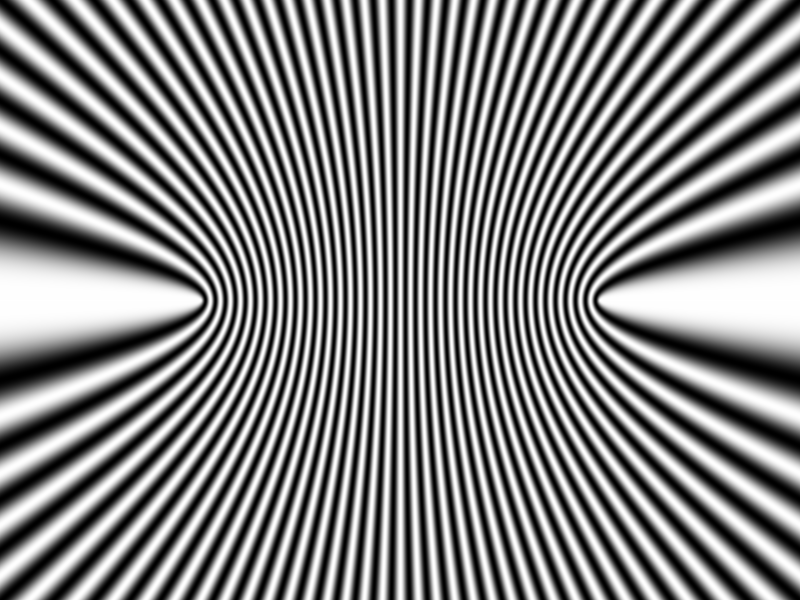

In [11]:
height = 600
width = 800
scale = 20
x = np.arange(-width/scale/2, width/scale/2, 1/scale)
y = np.arange(-height/scale/2, height/scale/2, 1/scale)
arrX, arrY = np.meshgrid(x, y)
h = F(arrX, arrY)
Image.fromarray((h * 255).astype(np.uint8))

## Plotting the Pattern on a Screen

If you have heard of the _two-slit experiment_, the single most famous experiment in demonstrating interference, it will look something like this.  You set up a screen (a piece of film, for example) at a distance from the two slits (which behave just like our two sources), and on that screen you'll actually see light and dark bands, like this.

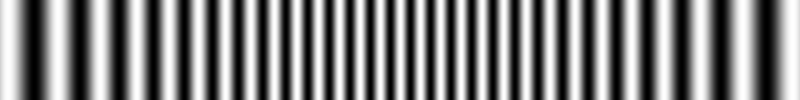

In [12]:
height = 400
width = 800
scale = 2
x = np.arange(-width/2/scale, width/2/scale, 1/scale)
y = np.arange(-height/scale,10, 1/scale)
arrX, arrY = np.meshgrid(x, y)
h = F(arrX, arrY)
arr = h * 255
# arr = np.concatenate([
#     np.tile(arr[0], 100).reshape(100, width),
#     np.full(2 * width, 255).reshape(2, width),
#     arr
# ]).astype(np.uint8)

arr = np.tile(arr[0], 100).reshape(100, width).astype(np.uint8)
Image.fromarray(arr)

In [ ]:
arr

array([[107, 135, 163, ..., 189, 163, 135],
       [107, 135, 163, ..., 189, 163, 135],
       [107, 135, 163, ..., 189, 163, 135],
       ...,
       [107, 135, 163, ..., 189, 163, 135],
       [107, 135, 163, ..., 189, 163, 135],
       [107, 135, 163, ..., 189, 163, 135]], dtype=uint8)

## Exercises

1. Modify the wavelength. How do we do that? What happens?
1. Modify the relative phase. How do we do that? What happens? (This might be most interesting with a longer wavelength than the default.)